<a href="https://colab.research.google.com/github/souramrakesh/Technocolabs-Internship-Project-/blob/main/Bitcoin_Task-3_to_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activity 3 :Exploring and Preparing Data for Modeling

In [ ]:
%autosave 5

#  Import required libraries
import numpy as np
import pandas as pd
%matplotlib inline

Autosaving every 5 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Series of normalization functions useful
for normalizing time-series data.

Author: Luis Capelo
"""
def z_score(series):
    """
    Computes the normalized value using the Z-score
    technique. The Z-score is a technique used for
    normalizing Gaussian distributions representing
    each observation in relation to the distribution's
    mean and standard deviation. For precise definitions,
    see the Wikipedia article:
    
        https://en.wikipedia.org/wiki/Standard_score
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    result = (series - series.mean()) / series.std(ddof=0)
    return result

def point_relative_normalization(series):
    """
    Computes the normalized value for the values of a
    given series by using the first element of the serie as p_0
    as a reference for each p_i.
    
    This technique comes from Siraj Raval's YouTube video
    "How to Predict Stock Prices Easily - Intro to Deep Learning #7",
    available at:
    
        https://www.youtube.com/watch?v=ftMq5ps503w
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    result = (series / series.values[0]) - 1
    return result

def maximum_and_minimum_normalization(series, boundary=(0, 1)):
    """
    Computes the normalized value for the values of a
    given serie by using that series maximum and minimum
    values.
    
    This technique is a direct implementation from 
    scikit-learn, available at:
    
        http://scikit-learn.org/stable/modules/generated/\
            sklearn.preprocessing.MinMaxScaler.html
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    boundary: set
        Maximum and minimum values used to
        scale the series.
        
    Returns
    -------
    result: list
        List with the normalized results.
    """
    range_min, range_max = boundary
    standard_deviation = (series - series.min(axis=0)) / (series.max(axis=0) - series.min(axis=0))
    result = standard_deviation * (range_max - range_min) + range_min

    return result


In [ ]:
import pandas as pd
#  Load the dataset as a pandas DataFrame
bitcoin = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_historical_prices.csv')

#  Change `date` column to datetime type
bitcoin['date'] = pd.to_datetime(bitcoin['date'])
bitcoin.head()

,date,iso_week,open,high,low,close,volume,market_capitalization
0,2013-04-28,2013-17,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,2013-17,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,2013-17,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,2013-17,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,2013-17,116.38,125.60,92.28,105.21,NaN,1.292190e+09


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1655 non-null   datetime64[ns]
 1   iso_week               1655 non-null   object        
 2   open                   1655 non-null   float64       
 3   high                   1655 non-null   float64       
 4   low                    1655 non-null   float64       
 5   close                  1655 non-null   float64       
 6   volume                 1412 non-null   float64       
 7   market_capitalization  1655 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 103.6+ KB


In [ ]:
bitcoin.shape

(1655, 8)

In [ ]:
bitcoin.isnull().sum()

date                       0
iso_week                   0
open                       0
high                       0
low                        0
close                      0
volume                   243
market_capitalization      0
dtype: int64

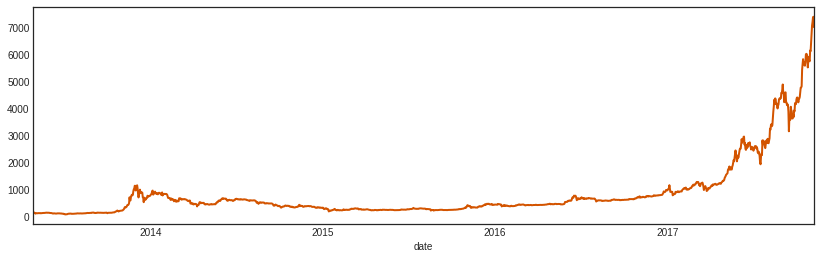

In [ ]:
#  Time-series plot for `close` variable
bitcoin.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

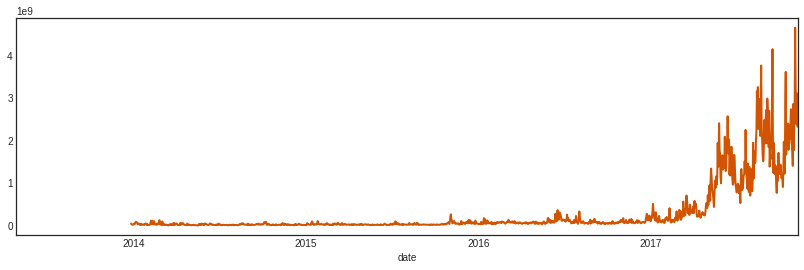

In [ ]:
#  Time-series plot for `volume` variable
bitcoin.set_index('date')['volume'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

In [ ]:
# Filter for newer or equal to Jan 1, 2016
bitcoin_recent = bitcoin[bitcoin['date'] >= '2016-01-01']

In [ ]:
#  Keep only the `close` and `volume` variables
bitcoin_recent = bitcoin_recent[['date', 'iso_week', 'close', 'volume']]

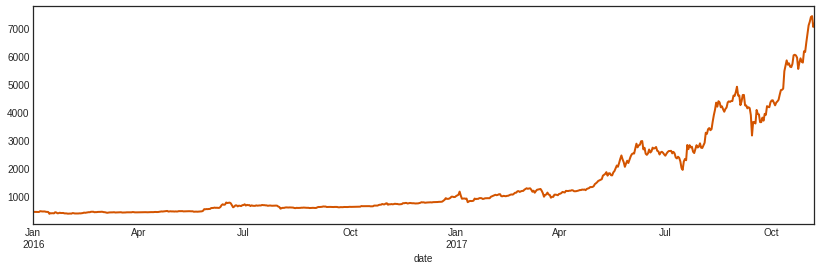

In [ ]:
#  Time-series plot for `close` variable after filtering the date
bitcoin_recent.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

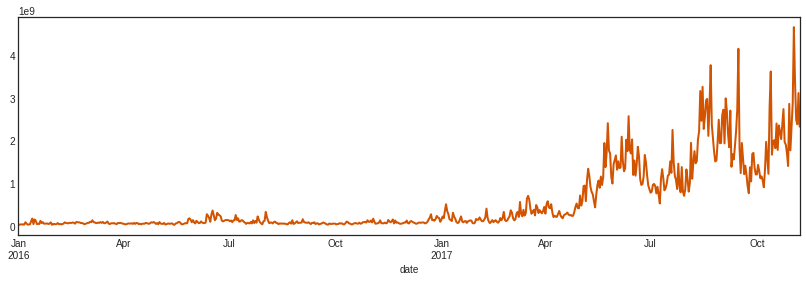

In [ ]:
#  Time-series plot for `volume` variable after filtering the date
bitcoin_recent.set_index('date')['volume'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

In [ ]:
bitcoin_recent.isnull().sum()

date        0
iso_week    0
close       0
volume      0
dtype: int64

In [ ]:
#  Normalize our data for the the `close` variable.
bitcoin_recent['close_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['close'].apply(
    lambda x: point_relative_normalization(x))

In [ ]:
bitcoin_recent.head()

,date,iso_week,close,volume,close_point_relative_normalization
978,2016-01-01,2016-00,434.33,36278900.0,0.000000
979,2016-01-02,2016-00,433.44,30096600.0,-0.002049
980,2016-01-03,2016-01,430.01,39633800.0,0.000000
981,2016-01-04,2016-01,433.09,38477500.0,0.007163
982,2016-01-05,2016-01,431.96,34522600.0,0.004535


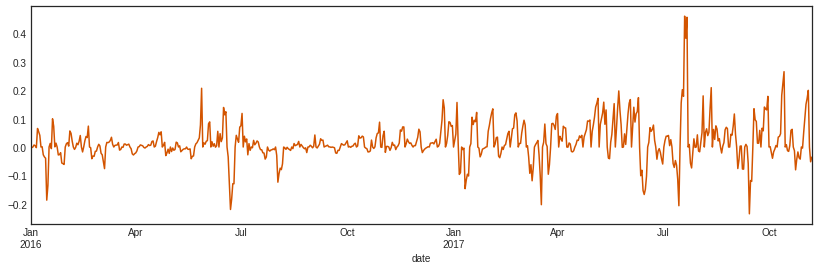

In [ ]:
#  Plot for normalized variable `close_point_relative_normalization`
bitcoin_recent.set_index('date')['close_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

In [ ]:
#  TASK:
#  Normalize our data for the the `volume` variable.
#  Use the name: `volume_point_relative_normalization`
#  Normalize our data for the the `close` variable.
bitcoin_recent['volume_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['volume'].apply(lambda x: point_relative_normalization(x))

In [ ]:
bitcoin_recent.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
978,2016-01-01,2016-00,434.33,36278900.0,0.000000,0.000000
979,2016-01-02,2016-00,433.44,30096600.0,-0.002049,-0.170410
980,2016-01-03,2016-01,430.01,39633800.0,0.000000,0.000000
981,2016-01-04,2016-01,433.09,38477500.0,0.007163,-0.029175
982,2016-01-05,2016-01,431.96,34522600.0,0.004535,-0.128961


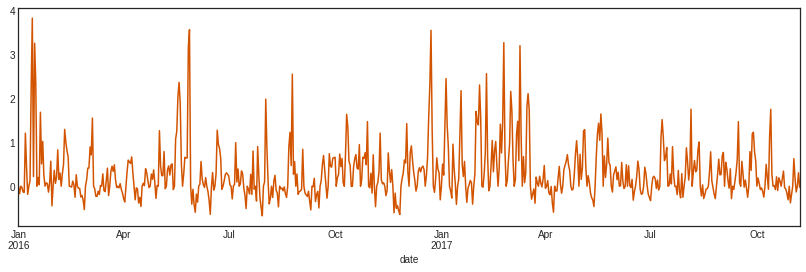

In [ ]:
#  TASK:
#  Plot for normalized variable `volume_point_relative_normalization` 
bitcoin_recent.set_index('date')['volume_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

## Training and Test Sets

In [ ]:
#  Use the last 20% of available weeks as a test set and the first 80% as a training set.
boundary = int(0.8 * bitcoin_recent['iso_week'].nunique())
train_set_weeks = bitcoin_recent['iso_week'].unique()[0:boundary]
test_set_weeks = bitcoin_recent[~bitcoin_recent['iso_week'].isin(train_set_weeks)]['iso_week'].unique()

print(train_set_weeks)
print(test_set_weeks)

['2016-00' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2016-13'
 '2016-14' '2016-15' '2016-16' '2016-17' '2016-18' '2016-19' '2016-20'
 '2016-21' '2016-22' '2016-23' '2016-24' '2016-25' '2016-26' '2016-27'
 '2016-28' '2016-29' '2016-30' '2016-31' '2016-32' '2016-33' '2016-34'
 '2016-35' '2016-36' '2016-37' '2016-38' '2016-39' '2016-40' '2016-41'
 '2016-42' '2016-43' '2016-44' '2016-45' '2016-46' '2016-47' '2016-48'
 '2016-49' '2016-50' '2016-51' '2016-52' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2017-13' '2017-14' '2017-15' '2017-16' '2017-17'
 '2017-18' '2017-19' '2017-20' '2017-21' '2017-22' '2017-23' '2017-24'
 '2017-25']
['2017-26' '2017-27' '2017-28' '2017-29' '2017-30' '2017-31' '2017-32'
 '2017-33' '2017-34' '2017-35' '2017-36' '2017-37' '2017-38' '2017-39'
 '2017-40' '2017-41' '2017-42' '2017-43' '2017-44' '2017-45']


In [ ]:
#  Create train dataset
train_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(train_set_weeks)]

In [ ]:
train_dataset.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
978,2016-01-01,2016-00,434.33,36278900.0,0.000000,0.000000
979,2016-01-02,2016-00,433.44,30096600.0,-0.002049,-0.170410
980,2016-01-03,2016-01,430.01,39633800.0,0.000000,0.000000
981,2016-01-04,2016-01,433.09,38477500.0,0.007163,-0.029175
982,2016-01-05,2016-01,431.96,34522600.0,0.004535,-0.128961


In [ ]:
print(train_dataset.shape)

(541, 6)


In [ ]:
#  TASK:
#  Create test dataset by performing the same operation as above.
#  Use the `test_set_weeks` list to create the variable `test_dataset`.
test_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(test_set_weeks)]

In [ ]:
test_dataset.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
1519,2017-06-25,2017-26,2589.41,1.161100e+09,0.000000,0.000000
1520,2017-06-26,2017-26,2478.45,1.663280e+09,-0.042851,0.432504
1521,2017-06-27,2017-26,2552.45,1.489790e+09,-0.014274,0.283085
1522,2017-06-28,2017-26,2574.79,1.183870e+09,-0.005646,0.019611
1523,2017-06-29,2017-26,2539.32,9.499790e+08,-0.019344,-0.181828


In [ ]:
test_dataset.shape

(136, 6)

## Storing Output

In [ ]:
# saving the data_sets we created
bitcoin_recent.to_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_recent.csv', index=False)
train_dataset.to_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/train_dataset.csv', index=False)
test_dataset.to_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/test_dataset.csv', index=False)

# Activity 4: Creating a TensorFlow Model using Keras
In this notebook we design and compile a deep learning model using Keras as an interface to TensorFlow. We will continue to modify this model in our next lessons and activities by experimenting with different optimization techniques. However, the essential components of the model are entirely designed in this notebook.

## Building a Model

In [ ]:
%autosave 5

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation

Autosaving every 5 seconds


In [ ]:
period_length = 7
number_of_periods = 76

In [ ]:
def build_model(period_length, number_of_periods, batch_size=1):
    """Build an LSTM model using Keras.

    Parameters
    ----------
    period_length: int
        The size of each observation used as input.

    number_of_periods: int
        The number of periods available in the
        dataset.

    batch_size: int
        The size of the batch used in each training
        period.

    Returns
    -------
    model: Keras model
        Compiled Keras model that can be trained
        and stored in disk.
    """
    model = Sequential()
    model.add(LSTM(
        units=period_length,
        batch_input_shape=(batch_size, number_of_periods, period_length),
        input_shape=(number_of_periods, period_length),
        return_sequences=False, stateful=False))

    model.add(Dense(units=period_length))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    

    return model

## Saving Model

In [ ]:
model = build_model(period_length=period_length, number_of_periods=number_of_periods)

In [ ]:
model.save('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_lstm_v0.h5')

# Activity 5: Assembling a Deep Learning System
In this activity, we will train the first version of our LSTM model using Bitcoin daily closing prices. These prices will be organized using the weeks of both 2016 and 2017. We do that because we are interested in predicting the prices of a week's worth of trading.

In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from keras.models import load_model

Autosaving every 5 seconds


In [ ]:
#  Import training dataset
train = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/train_dataset.csv')
train.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
0,2016-01-01,2016-00,434.33,36278900.0,0.000000,0.000000
1,2016-01-02,2016-00,433.44,30096600.0,-0.002049,-0.170410
2,2016-01-03,2016-01,430.01,39633800.0,0.000000,0.000000
3,2016-01-04,2016-01,433.09,38477500.0,0.007163,-0.029175
4,2016-01-05,2016-01,431.96,34522600.0,0.004535,-0.128961


## Reshape Data

In [ ]:
def create_groups(data, group_size=7):
    """Create distinct groups from a continuous series.
    
    Parameters
    ----------
    data: np.array
        Series of continious observations.

    group_size: int, default 7
        Determines how large the groups are. That is,
        how many observations each group contains.
    
    Returns
    -------
    A Numpy array object. 
    """
    samples = []
    for i in range(0, len(data), group_size):
        sample = list(data[i:i + group_size])
        if len(sample) == group_size:
            samples.append(np.array(sample).reshape(1, group_size))
    
    return np.array(samples)

In [ ]:
#  Find the remainder when the number of observations is divided by group size
len(train) % 7

2

In [ ]:
#  Create groups of 7 from our data.
#  We drop the first two observations so that the
#  number of total observations is divisible by the `group_size`.
data = create_groups(train['close_point_relative_normalization'][2:].values)
print(data.shape)

(77, 1, 7)


In [ ]:
#  Reshape data into format expected by LSTM layer
X_train = data[:-1, :].reshape(1, 76, 7)
Y_validation = data[-1].reshape(1, 7)
print(X_train.shape)
print(Y_validation.shape)

(1, 76, 7)
(1, 7)


## Load Our Model

In [ ]:
model = load_model('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_lstm_v0.h5')

## Train model

In [ ]:
%%time
#  Train the model
history = model.fit(
    x=X_train, y=Y_validation,
    batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 8.3247e-04
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 5.7984e-04
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 4.2379e-04
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 3.1803e-04
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 2.4218e-04
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 1.8544e-04
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4202e-04
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 1.0837e-04
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 8.2190e-05
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 6.1831e-05
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 4.6071e-05
Epoch 13/100
1/1 

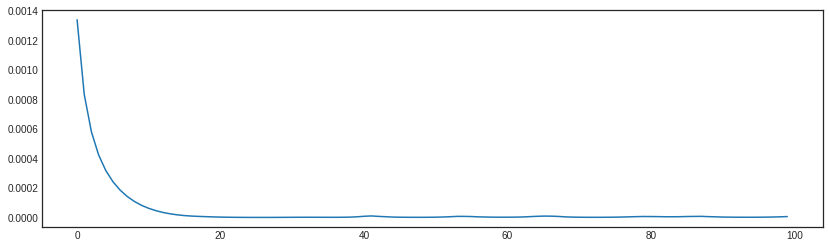

In [ ]:
#  Plot loss function
pd.Series(history.history['loss']).plot(figsize=(14, 4));

we can see that loss decreases as the epoch increases

## Make Predictions

In [ ]:
#  Make predictions using X_train data
predictions = model.predict(x=X_train)[0]
predictions

array([-0.00320655,  0.01692765,  0.07163848,  0.0583264 ,  0.06456939,
        0.0794917 ,  0.02621541], dtype=float32)

In [ ]:
def denormalize(series, last_value):
    """Denormalize the values for a given series.
    
    This uses the last value available (i.e. the last
    closing price of the week before our prediction)
    as a reference for scaling the predicted results.
    """
    result = last_value * (series + 1)
    return result

In [ ]:
#  Denormalize predictions
last_weeks_value = train[train['date'] == train['date'][:-7].max()]['close'].values[0]

denormalized_prediction = denormalize(predictions, last_weeks_value)
denormalized_prediction

array([2647.3638, 2700.8376, 2846.143 , 2810.7876, 2827.3684, 2867.0005,
       2725.505 ], dtype=float32)

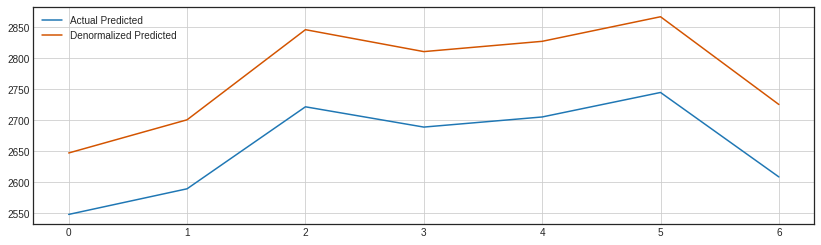

In [ ]:
#  Plot denormalized predictions against actual predictions
plt.figure(figsize=(14, 4))

plt.plot(train['close'][-7:].values, label='Actual Predicted')
plt.plot(denormalized_prediction, color='#d35400', label='Denormalized Predicted')

plt.grid()
plt.legend();

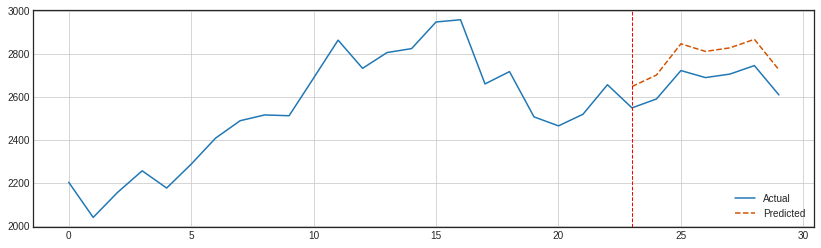

In [ ]:
prediction_plot = np.zeros(len(train)-2)
prediction_plot[:] = np.nan
prediction_plot[-7:] = denormalized_prediction

plt.figure(figsize=(14, 4))
plt.plot(train['close'][-30:].values, label='Actual')
plt.plot(prediction_plot[-30:], color='#d35400', linestyle='--', label='Predicted')
plt.axvline(30 - 7, color='r', linestyle='--', linewidth=1)

plt.grid()
plt.legend(loc='lower right');

In [ ]:
model.save('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_lstm_v0_trained.h5')

# Activity 6: Creating an active training environment
In this activity we learn to evaluate our LSTM model and to actively train it with new data.

## Load Data

In [ ]:
"""Utility functions used in Activity 6."""
import numpy as np


def create_groups(data, group_size=7):
    """Create distinct groups from a continuous series.

    Parameters
    ----------
    data: np.array
        Series of continious observations.

    group_size: int, default 7
        Determines how large the groups are. That is,
        how many observations each group contains.

    Returns
    -------
    A Numpy array object.
    """
    samples = list()
    for i in range(0, len(data), group_size):
        sample = list(data[i:i + group_size])
        if len(sample) == group_size:
            samples.append(np.array(sample).reshape(1, group_size).tolist())

    a = np.array(samples)
    return a.reshape(1, a.shape[0], group_size)


def split_lstm_input(groups):
    """Split groups in a format expected by the LSTM layer.

    Parameters
    ----------
    groups: np.array
        Numpy array with the organized sequences.

    Returns
    -------
    X, Y: np.array
        Numpy arrays with the shapes required by
        the LSTM layer. X with (1, a - 1, b)
        and Y with (1, b). Where a is the total
        number of groups in `group` and b the
        number of observations per group.
    """
    X = groups[0:, :-1].reshape(1, groups.shape[1] - 1, groups.shape[2])
    Y = groups[0:, -1:][0]

    return X, Y


def mape(A, B):
    """Calculate the mean absolute percentage error from two series."""
    return np.mean(np.abs((A - B) / A)) * 100


def rmse(A, B):
    """Calculate the root mean square error from two series."""
    return np.sqrt(np.square(np.subtract(A, B)).mean())

In [ ]:
"""Utility functions used in Activity 7."""

import random
import numpy as np

from matplotlib import pyplot as plt
from keras.callbacks import TensorBoard


def create_groups(data, group_size=7):
    """Create distinct groups from a continuous series.

    Parameters
    ----------
    data: np.array
        Series of continious observations.

    group_size: int, default 7
        Determines how large the groups are. That is,
        how many observations each group contains.

    Returns
    -------
    A Numpy array object.
    """
    samples = list()
    for i in range(0, len(data), group_size):
        sample = list(data[i:i + group_size])
        if len(sample) == group_size:
            samples.append(np.array(sample).reshape(1, group_size).tolist())

    a = np.array(samples)
    return a.reshape(1, a.shape[0], group_size)


def split_lstm_input(groups):
    """Split groups in a format expected by the LSTM layer.

    Parameters
    ----------
    groups: np.array
        Numpy array with the organized sequences.

    Returns
    -------
    X, Y: np.array
        Numpy arrays with the shapes required by
        the LSTM layer. X with (1, a - 1, b)
        and Y with (1, b). Where a is the total
        number of groups in `group` and b the
        number of observations per group.
    """
    X = groups[0:, :-1].reshape(1, groups.shape[1] - 1, groups.shape[2])
    Y = groups[0:, -1:][0]

    return X, Y


def mape(A, B):
    """Calculate the mean absolute percentage error from two series."""
    return np.mean(np.abs((A - B) / A)) * 100


def rmse(A, B):
    """Calculate the root mean square error from two series."""
    return np.sqrt(np.square(np.subtract(A, B)).mean())


def train_model(model, X, Y, epochs=100, version=0, run_number=0):
    """Shorthand function for training a new model.

    This function names each run of the model
    using the TensorBoard naming conventions.

    Parameters
    ----------
    model: Keras model instance
        Compiled Keras model.

    X, Y: np.array
        Series of observations to be used in
        the training process.

    version: int
        Version of the model to run.

    run_number: int
        The number of the run. Used in case
        the same model version is run again.
    """
    hash = random.getrandbits(128)
    hex_code = '%032x' % hash
    model_name = f'bitcoin_lstm_v{version}_run_{run_number}_{hex_code[:6]}'

    tensorboard = TensorBoard(log_dir=f'/content/drive/My Drive/Technocolabs Internship Project/logs/{model_name}')
    
    model_history = model.fit(
        x=X, y=Y,
        batch_size=1, epochs=epochs,
        callbacks=[tensorboard],
        shuffle=False)

    return model_history


def plot_two_series(A, B, variable, title):
    """Plot two series using the same `date` index.

    Parameters
    ----------
    A, B: pd.DataFrame
        Dataframe with a `date` key and a variable
        passed in the `variable` parameter. Parameter A
        represents the "Observed" series and B the "Predicted"
        series. These will be labelled respectivelly.

    variable: str
        Variable to use in plot.

    title: str
        Plot title.
    """
    plt.figure(figsize=(14, 4))
    plt.xlabel('Observed and predicted')

    ax1 = A.set_index('date')[variable].plot(
        color='#d35400', grid=True, label='Observed', title=title)

    ax2 = B.set_index('date')[variable].plot(
        color='grey', grid=True, label='Predicted')

    ax1.set_xlabel("Predicted Week")
    ax1.set_ylabel("Predicted Values")

    plt.legend()
    plt.show()


def denormalize(reference, series,
                normalized_variable='close_point_relative_normalization',
                denormalized_variable='close'):
    """Denormalize the values for a given series.

    Parameters
    ----------
    reference: pd.DataFrame
        DataFrame to use as reference. This dataframe
        contains both a week index and the USD price
        reference that we are interested on.

    series: pd.DataFrame
        DataFrame with the predicted series. The
        DataFrame must have the same columns as the
        `reference` dataset.

    normalized_variable: str, default 'close_point_relative_normalization'
        Variable to use in normalization.

    denormalized_variable: str, default `close`
        Variable to use in de-normalization.

    Returns
    -------
    A modified DataFrame with the new variable provided
    in `denormalized_variable` parameter.
    """
    week_values = reference[reference['iso_week'] == series['iso_week'].values[0]]
    last_value = week_values[denormalized_variable].values[0]
    series[denormalized_variable] = last_value * (series[normalized_variable] + 1)

    return series

In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from keras.models import load_model
from keras.callbacks import TensorBoard
from datetime import datetime, timedelta

np.random.seed(0)

Autosaving every 5 seconds


In [ ]:
#  Load datasets
train = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/train_dataset.csv')
test = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/test_dataset.csv')

In [ ]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)

test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [ ]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(1, 76, 7)
(1, 7)


## Re-train Model with TensorBoard

In [ ]:
def train_model(model, X, Y, epochs, version, run_number):
    """Training a model with TensorBoard callback.

    This function names each run of the model
    using the TensorBoard naming conventions.

    Parameters
    ----------
    model: Keras model instance
        Compiled Keras model.

    X, Y: np.array
        Series of observations to be used in
        the training process.

    epochs: int
        The number of epochs to train the
        model for.

    version: int
        Version of the model to run.

    run_number: int
        The number of the run. Used in case
        the same model version is run again.
    """
    model_name = f'bitcoin_lstm_v{version}_run_{run_number}'
    tensorboard = TensorBoard(log_dir=f'/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/logs/{model_name}')

    #  TASK:
    #  Modify the `fit` method to include a TensorBoard callback.
    #
    #tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    model_history = model.fit(
        x=X, y=Y,
        batch_size=1, epochs=epochs,
        shuffle=False,callbacks=[tensorboard])

    return model_history

In [ ]:
#  Load previously trained network
model = load_model('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_lstm_v0.h5')

In [ ]:
#  Retrain network
model_history = train_model(model=model,
                            X=X_train, Y=Y_train,
                            epochs=100,
                            version=0, run_number=1)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3247e-04
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 5.7984e-04
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 4.2379e-04
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 3.1803e-04
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 2.4218e-04
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 1.8544e-04
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 1.4202e-04
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0837e-04
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2190e-05
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 6.1831e-05
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 4.6071e-05
Epoch 13/100
1/1 

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir '/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/logs'

Reusing TensorBoard on port 6006 (pid 354), started 0:13:17 ago. (Use '!kill 354' to kill it.)

<IPython.core.display.Javascript object>

## Evaluate LSTM Model

In [ ]:
#  Combine training and testing datasets
combined_set = np.concatenate((train_data, test_data), axis=1)

In [ ]:
#  Evaluate model at each week for the test set
evaluated_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 77]

    X_test = input_series[0:, :-1].reshape(1, input_series.shape[1] - 1, 7)
    Y_test = input_series[0:, -1:][0]

    result = model.evaluate(x=X_test, y=Y_test, verbose=0)
    evaluated_weeks.append(result)

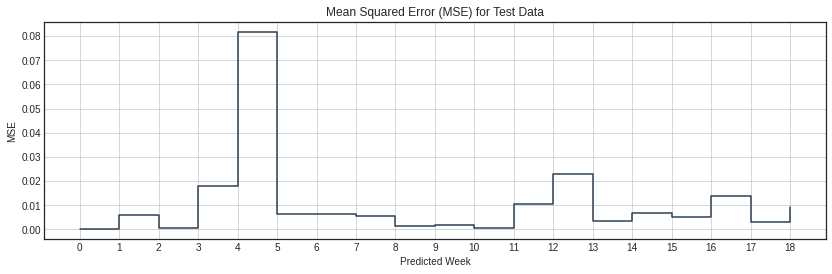

In [ ]:
#  Plot MSE for all evaluated weeks
ax = pd.Series(evaluated_weeks).plot(drawstyle="steps-post",
                                     figsize=(14, 4),
                                     color='#2c3e50',
                                     grid=True,
                                     title='Mean Squared Error (MSE) for Test Data')

ax.set_xticks(range(0, len(evaluated_weeks)))
ax.set_xlabel("Predicted Week")
ax.set_ylabel("MSE")
plt.show()

## Interpreting Model Results

### Make Predictions

In [ ]:
#  Make predictions for each of the 19 weeks
#  in the test set
predicted_weeks = []
for i in range(0, test_data.shape[1]):
    input_series = combined_set[0:, i:i + 76]
    predicted_weeks.append(model.predict(input_series))

In [ ]:
#  Flatten `predicted_weeks` to get a list
#  of predictions for each day in the 19 weeks
predicted_days = []
for week in predicted_weeks:
    predicted_days += list(week[0])

In [ ]:
#  Create list of dates associated with predictions
last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
list_of_days = []
for days in range(1, len(predicted_days) + 1):
    D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
    list_of_days.append(D)

In [ ]:
#  Create dataframe with predicted values
predicted = pd.DataFrame({
    'date': list_of_days,
    'close_point_relative_normalization': predicted_days
})
predicted.head()

,date,close_point_relative_normalization
0,2017-06-25,-0.003207
1,2017-06-26,0.016928
2,2017-06-27,0.071638
3,2017-06-28,0.058326
4,2017-06-29,0.064569


In [ ]:
#  Convert `date` variable to datetime
predicted['date'] = predicted['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
def plot_two_series(A, B, variable, title):
    """Plot two series using the same `date` index. 
    
    Parameters
    ----------
    A, B: pd.DataFrame
        Dataframe with a `date` key and a variable
        passed in the `variable` parameter. Parameter A
        represents the "Observed" series and B the "Predicted"
        series. These will be labelled respectively. 
    
    variable: str
        Variable to use in plot.
    
    title: str
        Plot title.
    """
    plt.figure(figsize=(14, 4))
    plt.xlabel('Observed and predicted')

    ax1 = A.set_index('date')[variable].plot(
        color='#d35400', grid=True, label='Observed', title=title)

    ax2 = B.set_index('date')[variable].plot(
        color='grey', grid=True, label='Predicted')
    
    ax1.set_xlabel("Predicted Week")
    ax1.set_ylabel("Predicted Values")

    plt.legend()
    plt.show()

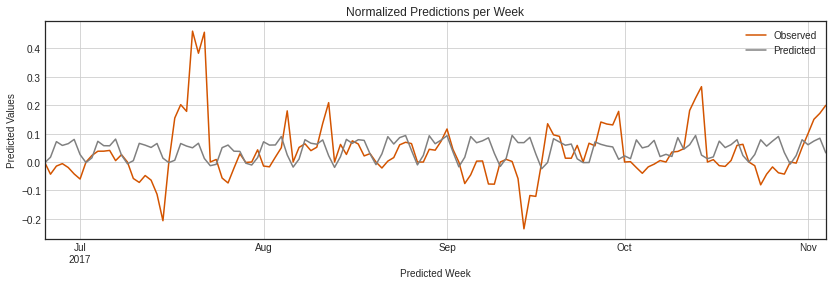

In [ ]:
#  Plot predicted normalized prices
#  against actual normalized prices
plot_two_series(A=test[:-3],
                B=predicted,
                variable='close_point_relative_normalization',
                title='Normalized Predictions per Week')

### De-normalize Predictions

In [ ]:
#  Add variable `iso_week` by stripping the Year and Week from `date`
predicted['iso_week'] = predicted['date'].apply(
    lambda x: x.strftime('%Y-%U'))

In [ ]:
def denormalize(reference, series,
                normalized_variable='close_point_relative_normalization',
                denormalized_variable='close'):
    """Denormalize the values for a given series.

    Parameters
    ----------
    reference: pd.DataFrame
        DataFrame to use as reference. This dataframe
        contains both a week index and the USD price
        reference that we are interested on.

    series: pd.DataFrame
        DataFrame with the predicted series. The
        DataFrame must have the same columns as the
        `reference` dataset.

    normalized_variable: str, default 'close_point_relative_normalization'
        Variable to use in normalization.

    denormalized_variable: str, default `close`
        Variable to use in de-normalization.

    Returns
    -------
    A modified DataFrame with the new variable provided
    in `denormalized_variable` parameter.
    """
    week_values = reference[reference['iso_week'] == series['iso_week'].values[0]]
    last_value = week_values[denormalized_variable].values[0]
    series[denormalized_variable] = last_value * (series[normalized_variable] + 1)

    return series

In [ ]:
#  Denormalize predictions
predicted_close = predicted.groupby('iso_week').apply(
    lambda x: denormalize(test[:-3], x))

In [ ]:
#  Plot denormalized predictions and observed closing prices in test set
plot_two_series(A=test[:-3],
                B=predicted_close,
                variable='close',
                title='De-normalized Predictions per Week')

### Calculate RMSE and MAPE

In [ ]:
A = test[:-3]['close_point_relative_normalization']
B = predicted_close['close_point_relative_normalization']

print(f'Normalized RMSE: {rmse(A, B):.2f}')

Normalized RMSE: 0.10


In [ ]:
A = test[:-3]['close']
B = predicted_close['close']

print(f'De-normalized RMSE: {rmse(A, B):.2f}')
print(f'De-normalized MAPE: {mape(A, B):.2f}')

De-normalized RMSE: 356.35
De-normalized MAPE: 6.66


# Activity 7: Optimizing a deep learning model
In this activity we optimize our deep learning model. We aim to achieve greater performance than our model `bitcoin_lstm_v0`, which is off at about 6.8% from the real Bitcoin prices. We explore the following topics in this notebook:

* Experimenting with different layers and the number of nodes
* Grid search strategy for epoch and activation functions

## Load Data

In [ ]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from datetime import datetime, timedelta
from keras.models import load_model, Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout, ActivityRegularization
from keras.callbacks import TensorBoard
np.random.seed(0)

Autosaving every 5 seconds


In [ ]:
#  Load datasets
train = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/train_dataset.csv')
test = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/test_dataset.csv')

In [ ]:
#  Convert `date` column to datetime type
test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)
test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [ ]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

## Reference Model

In [ ]:
#  TASK:
#  Load data for `v0` of our model.
#  Call this `model_v0`.
model_v0 = load_model('/content/drive/My Drive/Technocolabs Internship Project/Bitcoin/bitcoin_lstm_v0.h5')

In [ ]:
%%time

#  TASK:
#  Train the reference model `model_v0`.
train_model(model=model_v0,X=X_train, Y=Y_train,epochs=100,version=0, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4727e-04
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5787e-04
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 7.7637e-04
Epoch 13/100
1/1 [==============================]

In [ ]:
%tensorboard --logdir '/content/drive/My Drive/Technocolabs Internship Project/logs/'

Reusing TensorBoard on port 6007 (pid 577), started 0:05:23 ago. (Use '!kill 577' to kill it.)

<IPython.core.display.Javascript object>

## Adding Layers and Nodes

In [ ]:
#  Initialize variables
period_length = 7
number_of_periods = 76
batch_size = 1

In [ ]:
#  Model 1: two LSTM layers
model_v1 = Sequential()
# Layer 1
model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))   # note return_sequences is now true
#  TASK:
#  Add new LSTM layer to this network here.
# Layer 2
model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))   # note return_sequences is now False

model_v1.add(Dense(units=period_length))
model_v1.add(Activation("linear"))

model_v1.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time
train_model(model=model_v1, X=X_train, Y=Y_train, epochs=100, version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8292e-04
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5583e-04
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4563e-04
Epoch 13/100
1/1 [==============================]

## Epochs

In [ ]:
# Model 2: two LSTM layers, trained for 300 epochs
model_v2 = Sequential()

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v2.add(Dense(units=period_length))
model_v2.add(Activation("linear"))

model_v2.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time

#  TASK:
#  Change the number of epochs below
#  to 300 and evaluate the results on TensorBoard.
train_model(model=model_v2, X=X_train, Y=Y_train, epochs=300, version=2, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 8.5308e-04
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 7.3249e-04
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 6.3409e-04
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 5.5123e-04
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 4.7989e-04
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 4.1760e-04
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 3.6275e-04
Epoch 13/300
1/1 [===============

## Activation Functions

In [ ]:
# Model 3: two LSTM layers, trained for 300 epochs,
#          tanh activation function
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

#  TASK:
#  Change the activation function
#  from "linear" to "tanh".
model_v3.add(Activation("tanh"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time
train_model(model=model_v3, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 7.6370e-04
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 5.2827e-04
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 3.7562e-04
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 2.7160e-04
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.9893e-04
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 1.4745e-04
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1057e-04
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 8.3851e-05
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 6.4204e-05
Epoch 12/300
1/1 [==============================] - 0s 15ms/step - loss: 4.9521e-05
Epoch 13/300
1/1 [==

## Regularization Strategies

In [ ]:
model_v4 = Sequential()
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

#  TASK:
#  Implement a Dropout() here.
model.add(Dropout(0.2))


model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

#  TASK:
#  Implement a Dropout() here too.
model.add(Dropout(0.2))


model_v4.add(Dense(units=period_length))
model_v4.add(Activation("tanh"))

model_v4.compile(loss="mse", optimizer="rmsprop")

In [ ]:
%%time
train_model(model=model_v4, X=X_train, Y=Y_train, epochs=600, version=4, run_number=0)

Epoch 1/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 2/600
1/1 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 3/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 4/600
1/1 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 5/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 6/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 7/600
1/1 [==============================] - 0s 2ms/step - loss: 8.7867e-04
Epoch 8/600
1/1 [==============================] - 0s 3ms/step - loss: 7.4744e-04
Epoch 9/600
1/1 [==============================] - 0s 3ms/step - loss: 6.3737e-04
Epoch 10/600
1/1 [==============================] - 0s 3ms/step - loss: 5.4376e-04
Epoch 11/600
1/1 [==============================] - 0s 3ms/step - loss: 4.6337e-04
Epoch 12/600
1/1 [==============================] - 0s 2ms/step - loss: 3.9393e-04
Epoch 13/600
1/1 [===================

## Evaluate Models

In [ ]:
combined_set = np.concatenate((train_data, test_data), axis=1)

def evaluate_model(model, kind='series'):
    """Compute the MSE for all future weeks in period.
    
    Parameters
    ----------
    model: Keras trained model
    
    kind: str, default 'series'
        Kind of evaluation to perform. If 'series', 
        then the model will perform an evaluation 
        over the complete series.
    
    Returns
    -------
    evaluated_weeks: list
        List of MSE values for each evaluated
        test week.
    """
    if kind == 'series':
        predicted_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+76]
            predicted_weeks.append(model.predict(input_series))

        predicted_days = []
        for week in predicted_weeks:
            predicted_days += list(week[0])

        return predicted_days
    else:
        evaluated_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]

            X_test = input_series[0:,:-1].reshape(1, input_series.shape[1] - 1, 7)
            Y_test = input_series[0:,-1:][0]

            result = model.evaluate(x=X_test, y=Y_test, verbose=0)
            evaluated_weeks.append(result)
            
            return evaluated_weeks

In [ ]:
def plot_weekly_mse(series, model_name, color):
    """Plot weekly MSE."""
    ax = pd.Series(series).plot(drawstyle="steps-post",
                                figsize=(14,4),
                                color=color,
                                grid=True,
                                label=model_name,
                                alpha=0.7,
                                title='Mean Squared Error (MSE) for Test Data (all models)'.format(
                                       model_name))

    ax.set_xticks(range(0, len(series)))
    ax.set_xlabel("Predicted Week")
    ax.set_ylabel("MSE")

    return ax

In [ ]:
def plot_weekly_predictions(predicted_days, name, display_plot=True, 
                            variable='close'):
    """Plot weekly predictions and calculate RMSE and MAPE."""
    
    # Create dataframe to store predictions and associated dates
    last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
    list_of_days = []
    for days in range(1, len(predicted_days) + 1):
        D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
        list_of_days.append(D)
    
    predicted = pd.DataFrame({
        'date': list_of_days,
        'close_point_relative_normalization': predicted_days
    })
    
    # Convert `date` variable to datetime
    predicted['date'] = predicted['date'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Create iso_week column in `predicted` dataframe
    predicted['iso_week'] = predicted['date'].apply(
        lambda x: x.strftime('%Y-%U'))

    # Denormalize predictions
    predicted_close = predicted.groupby('iso_week').apply(
        lambda x: denormalize(test[:-3], x))

    # Plot denormalized predictions and observed values
    plot_two_series(test[:-3], predicted_close,
                    variable=variable,
                    title=f'{name}: Predictions per Week')
    
    # Calculate RMSE and MAPE
    print(f'RMSE: {rmse(test[:-3][variable], predicted_close[variable]):.2f}')
    print(f'MAPE: {mape(test[:-3][variable], predicted_close[variable]):.2f}%')

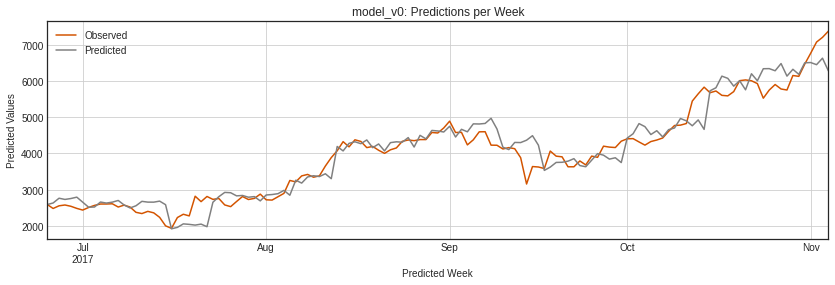

RMSE: 356.35
MAPE: 6.66%


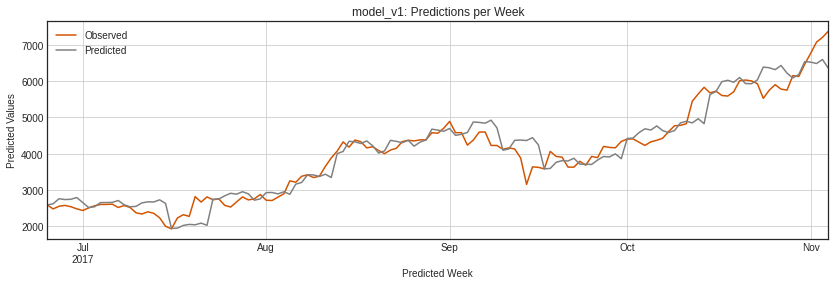

RMSE: 344.97
MAPE: 6.52%


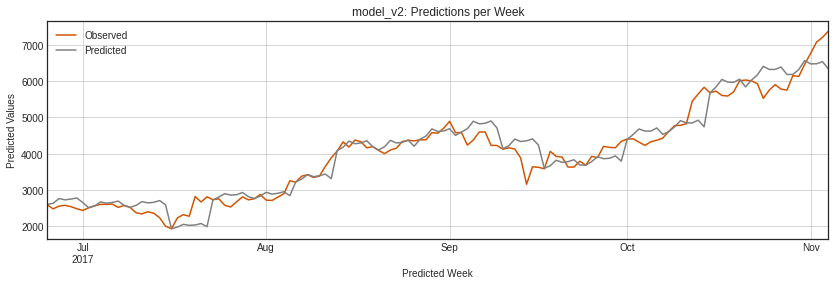

RMSE: 347.58
MAPE: 6.40%


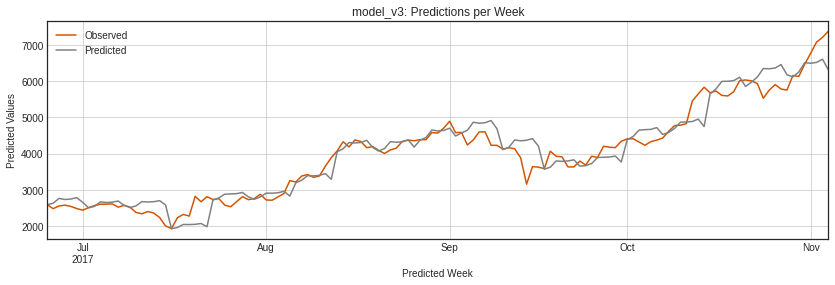

RMSE: 345.64
MAPE: 6.41%


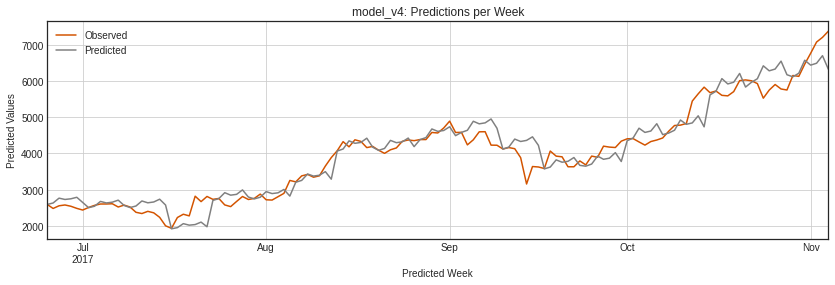

RMSE: 349.63
MAPE: 6.50%


In [ ]:
#  Evaluate each model trained in this activity in sequence
models = [model_v0, model_v1, model_v2, model_v3, model_v4]
for i, M in enumerate(models):
    predicted_days = evaluate_model(M, kind='series')
    plot_weekly_predictions(predicted_days, f'model_v{i}')